# Homework #1
## In this homework you are going to get familiar with basics of NetworkX and Gephi for analysing and visualizing networks. Make sure your submitted code is executable without any errors. Also, make sure to include all your output files in your submission. 

## Task 1: NetworkX
### NetworkX is a Python library for the analysis of networks. With NetworkX you can create, import, and manipulate graphs. Additionally, you can calculate basic properties of these graphs with its built-in functions. Unfortunately, NetworkX is not very powerful for visualizing large graphs which we are going to work with most of the time. For this reason, we are going to use a software called Gephi. In this homework, you are going to do some basic analysis on some graphs which you can download using the following code and then store the results in a format which is readable by Gephi. You then use Gephi (on your own computer) to visualize the results.  

### You can download Gephi from the following web page:
### https://gephi.org/users/download

###  You can also learn the basics of NetworkX library and Gephi by looking at the following pages:
### Some useful links to get familiar with NetworkX:
### NetworkX Documentation: https://networkx.github.io/documentation/stable/
### https://vimeo.com/124354692
### https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf
### Some useful links to get familiar with Gephi:
### https://gephi.org/users/tutorial-visualization/
### https://www.youtube.com/watch?v=FLiv3xnEepw

### In the whole homework you can use any function from the NetworkX  library that facilitates your task.

### Run the following cell to import the libraries that we are going to use in this homework:

In [4]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
import networkx as nx
import numpy as np
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')
import time

Populating the interactive namespace from numpy and matplotlib
CPU times: user 2.53 s, sys: 616 ms, total: 3.14 s
Wall time: 4.56 s


### Run the following cell to download the raw data for the networks (Facebook, Enron Emails, High Energy Physics Citations, and Erdos) we are going to work with:

In [5]:
%%time
# Creating directories for network files:
import os, errno
try:
    os.makedirs("data")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
try:
    os.makedirs("data/facebook")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
try:
    os.makedirs("data/enron")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
try:
    os.makedirs("data/citNet")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
try:
    os.makedirs("data/erdos")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise


# Download the network files:
import urllib

## Facebook Network:
urllib.urlretrieve("https://snap.stanford.edu/data/facebook_combined.txt.gz","data/facebook/facebook_combined.txt.gz")

## Citation Network:
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh.txt.gz", "data/citNet/cit-HepTh.txt.gz")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh-dates.txt.gz", "data/citNet/cit-HepTh-dates.txt.gz")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh-abstracts.tar.gz", "data/citNet/cit-HepTh-abstracts.tar.gz")


## Enron Network:
urllib.urlretrieve("https://snap.stanford.edu/data/email-Enron.txt.gz","data/enron/email-Enron.txt.gz")

## Erdos Network:
urllib.urlretrieve("https://files.oakland.edu/users/grossman/enp/Erdos1.html", "data/erdos/Erdos1.html")

CPU times: user 100 ms, sys: 28 ms, total: 128 ms
Wall time: 2.97 s


### Run the following cell to unzip and store the Facebook dateset in a .txt file which is readable by NetworkX:

In [6]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip

inF = gzip.GzipFile("data/facebook/facebook_combined.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/facebook/facebook_combined.txt", 'wb')
outF.write(s)
outF.close()

#load the network after converting into text file

file_name="data/facebook/facebook_combined.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g1=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g1.order(),g1.size()
print "FB No. of nodes are=",node
print "FB No. of edges are=",edge

#citation network
inF = gzip.GzipFile("data/citNet/cit-HepTh.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/citNet/cit-HepTh.txt", 'wb')
outF.write(s)
outF.close()

'''
inF = gzip.GzipFile("data/citNet/cit-HepTh.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/citNet/cit-HepTh.txt", 'wb')
outF.write(s)
outF.close()
'''

#load the network after converting into text file

file_name="data/citNet/cit-HepTh.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g2=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g2.order(),g2.size()
print "CitNET No. of nodes are=",node
print "CitNET No. of edges are=",edge


#enron network
inF = gzip.GzipFile("data/enron/email-Enron.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/enron/email-Enron.txt", 'wb')
outF.write(s)
outF.close()

#load the network after converting into text file

file_name="data/enron/email-Enron.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g3=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g3.order(),g3.size()
print "Enron No. of nodes are=",node
print "Enron No. of edges are=",edge

FB No. of nodes are= 4039
FB No. of edges are= 88234
CitNET No. of nodes are= 27770
CitNET No. of edges are= 352324
Enron No. of nodes are= 36692
Enron No. of edges are= 183831
CPU times: user 4.88 s, sys: 124 ms, total: 5 s
Wall time: 5.46 s


### Write a code that plots the degree distribution of the above graph. (Make sure you do not confuse degree distribution with degree sequence!)

figure saved
figure saved2
figure saved3
figure saved4


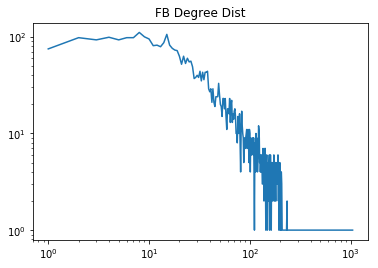

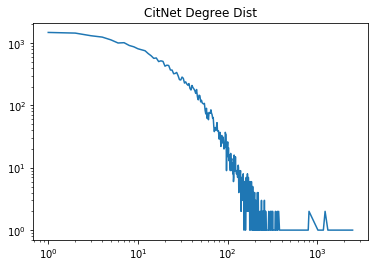

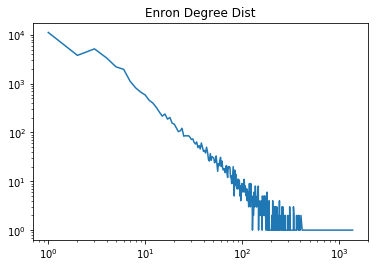

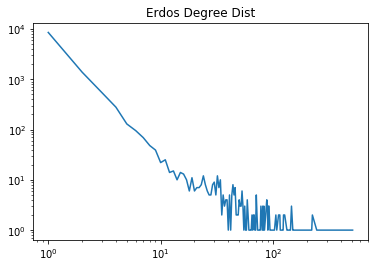

In [7]:
'''
Your code here.
adapted from http://snap.stanford.edu/class/cs224w-2012/nx_tutorial.pdf
'''
degs={}
for n in g1.nodes():
    deg=g1.degree(n)
    if deg not in degs:
        degs[deg]=0
    degs[deg]+=1
items=sorted(degs.items())

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items])
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("FB Degree Dist")
fig.savefig("deg_dist1.png")
print "figure saved"

#citnet code
degs2={}
for n in g2.nodes():
    deg=g2.degree(n)
    if deg not in degs2:
        degs2[deg]=0
    degs2[deg]+=1
items=sorted(degs2.items())

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items])
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("CitNet Degree Dist")
fig.savefig("deg_dist2.png")
print "figure saved2"

#enron code
degs3={}
for n in g3.nodes():
    deg=g3.degree(n)
    if deg not in degs3:
        degs3[deg]=0
    degs3[deg]+=1
items=sorted(degs3.items())

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items])
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Enron Degree Dist")
fig.savefig("deg_dist3.png")
print "figure saved3"

#erdos code
degs4={}
for n in g4.nodes():
    deg=g4.degree(n)
    if deg not in degs4:
        degs4[deg]=0
    degs4[deg]+=1
items=sorted(degs4.items())

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items])
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Erdos Degree Dist")
fig.savefig("deg_dist4.png")
print "figure saved4"

### Determine whether the above graph is connected or not. Otherwise, find and store its largest connected component.

In [9]:
print "is FB connected:",nx.is_connected(g1)
#nx.number_connected_components(g1)

#citnet code
print "is CitNet connected:",nx.is_connected(g2)
print "number of connected components:", nx.number_connected_components(g2)
#print "is graph directed:", nx.is_directed(g2)

#get largest component
Gcc = sorted(nx.connected_component_subgraphs(g2), key=len, reverse=True)
g22 = Gcc[0]
print "is CitNet subgraph connected:", nx.is_connected(g22)

#enron code
print "is Enron net connected:",nx.is_connected(g3)
print "is Enron graph directed:", nx.is_directed(g3)
print "number of connected components:", nx.number_connected_components(g3)
#get largest component
Gcc = sorted(nx.connected_component_subgraphs(g3), key=len, reverse=True)
g33 = Gcc[0]
print "is Enron subgraph connected:", nx.is_connected(g33)

#erdos code
print "is Erdos net connected:",nx.is_connected(g4)


is FB connected: True
is CitNet connected: False
number of connected components: 143
is CitNet subgraph connected: True
is Enron net connected: False
is Enron graph directed: False
number of connected components: 1065
is Enron subgraph connected: True
is Erdos net connected: True


###  Write a code that calculates and prints the network diameter and the average shortest path between any two nodes in the network.

In [10]:
%%time
'''
Your code here
'''
'''
print "FB diameter: ",nx.diameter(g1)
print "FB avg shortest path: ",nx.average_shortest_path_length(g1)


#citnet code for giant component only
g23=nx.to_undirected(g22)
print "changed to undirected"
print "CitNet diameter: ",nx.diameter(g23)
print "CitNet avg shortest path: ",nx.average_shortest_path_length(g23)


#enron code for giant component only
g34=nx.to_undirected(g33)
print "Enron diameter: ",nx.diameter(g34)
print "Enron avg shortest path: ",nx.average_shortest_path_length(g34)
'''
g23=nx.to_undirected(g22)
#erdos code
#print "Erdos diameter: ",nx.diameter(g4)
#print "Erdos avg shortest path: ",nx.average_shortest_path_length(g4)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.8 µs


### Write a code to calculate the clustering coeffient of the nodes of the graph and plot it as a histogram.

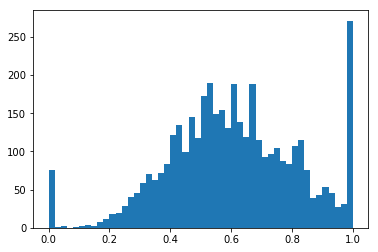

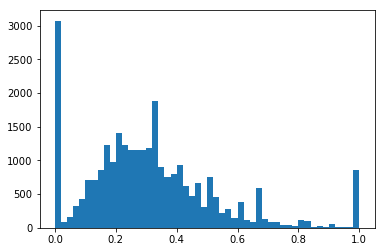

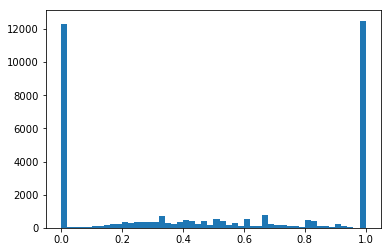

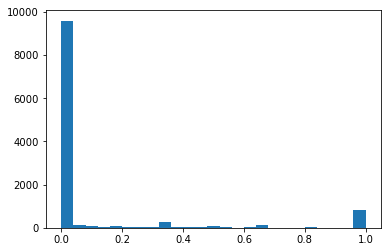

In [22]:
'''
Your code here
'''
d1 = nx.clustering(g1)
hist(d1.values(),bins=50) #facebook
show()

d2 = nx.clustering(g2)
hist(d2.values(),bins=50) #citnet
show()

d3 = nx.clustering(g3)
hist(d3.values(),bins=50) #enron
show()

d4=nx.clustering(g4)
hist(d4.values(),bins=25) #erdos
show()


### Write a code to calculate the degree centrality of the nodes of the graph and plot it as a histogram.

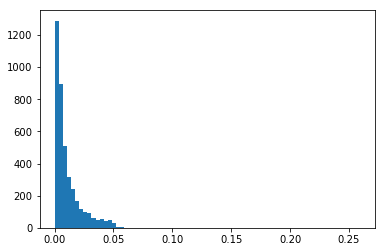

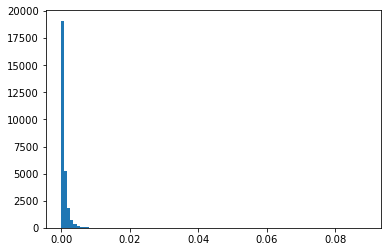

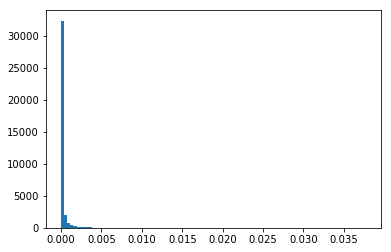

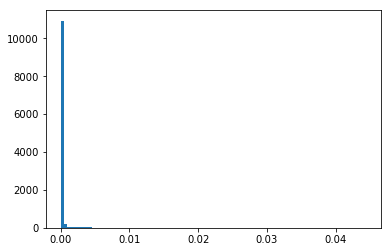

In [26]:
'''
Your code here
'''
c1= nx.degree_centrality(g1) #facebook
hist(c1.values(),bins=75)
show()

c2= nx.degree_centrality(g2) #citnet
hist(c2.values(),bins=100)
show()

c3= nx.degree_centrality(g3) #enron
hist(c3.values(),bins=100)
show()

c4= nx.degree_centrality(g4) #erdos
hist(c4.values(),bins=100)
show()





### Write a code to calculate the betweenness centrality of the nodes of the graph and plot it and plot it as a histogram.

In [8]:
'''
Your code here
This is calculated in the cell below
'''
'''
#facebook betweeness histogram
ymax = max(bn_cent.keys())
xmax = max(bn_cent.values())
figure()
hist(bn_cent.values(),bins=100)
title('FB Betweeness Cent Histogram') 
xlabel('Label')
ylabel('Another Label')
#axis([0, xmax, 0, ymax])
savefig('Facebook_bet_cent_histogram.png')
fout = "bn_cent.txt"
fo = open(fout, "w")
for k, v in bn_cent.items():
    fo.write(str(k) + ' ' + str(v) + '\n')
fo.close()
'''
#CitNet betweeness histogram
ymax = max(bn_cent2.keys())
xmax = max(bn_cent2.values())
figure()
hist(bn_cent2.values(),bins=100)
title('CitNet Betweeness Cent Histogram') 
xlabel('Label')
ylabel('Another Label')
#axis([0, xmax, 0, ymax])
savefig('CitNet_bet_cent_histogram.png')
fout = "bn_cent2.txt"
fo = open(fout, "w")
for k, v in bn_cent2.items():
    fo.write(str(k) + ' ' + str(v) + '\n')
fo.close()



NameError: name 'bn_cent' is not defined

### Write a code to calculate the eigenvector centrality of the nodes of the graph and plot it in as a histogram.

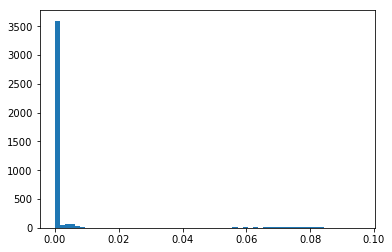

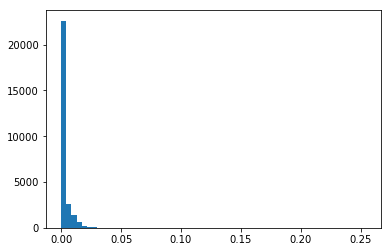

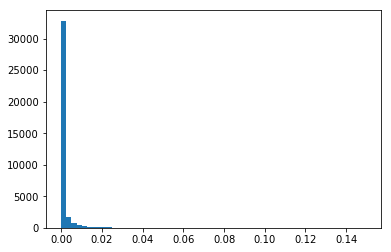

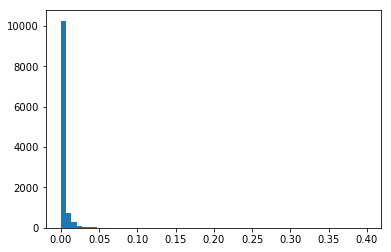

In [27]:
'''
Your code here
'''
centrality = nx.eigenvector_centrality(g1) #facebook
hist(centrality.values(),bins=60)
show()

centrality2 = nx.eigenvector_centrality(g2) #citnet
hist(centrality2.values(),bins=60)
show()

centrality3 = nx.eigenvector_centrality(g3) #enron
hist(centrality3.values(),bins=60)
show()

centrality4 = nx.eigenvector_centrality(g4) #erdos
hist(centrality4.values(),bins=60)
show()

### Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX write_gml method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next tasks.

In [7]:
'''
Your code here
'''
#fb gml 
#nx.set_node_attributes(g1, bn_cent,"betweenness")
#nx.set_node_attributes(g1, degs,"degdist")
#nx.write_gml(g1,"test.gml")

#citnet gml
# uncompress cit-HepTh-abstracts.tar.gz
'''
import tarfile
tarfile.open("data/citNet/cit-HepTh-abstracts.tar.gz").extractall("data/citNet/cit-HepTh-abstracts")
# extract the author name
def get_authors(l):
    authors = reduce(list.__add__, [a.split(",") for a in l[9:].split("and")])
    return [x.strip() for x in authors]
# attach the attribute author
#here G is your networkX graph
import os
thred = sorted(c2.values(), reverse=True)[100]
for subdir, dirs, files in os.walk("data/citNet/cit-HepTh-abstracts"):
    for fl in files:
        filepath = subdir + os.sep + fl
        
        if filepath.endswith(".abs"):
            node_num = int(fl[:-4])
            name = ""
            for l in open(filepath):
                if l.startswith("Authors:"):
                    name = get_authors(l)[0]
            if node_num in g22.nodes():
                if g2.node[node_num]['dc'] > thred:
                    g2.node[node_num]['author'] = name
                elif 'author' in g2.node[node_num]:
                    del g2.node[node_num]['author']
                    
print "finished adding authors"                    
nx.set_node_attributes(g22, bn_cent2,"betweenness")
nx.set_node_attributes(g22, degs2,"degdist")
nx.write_gml(g22,"test22.gml")
print "citnet gml created"
'''
#enron gml

#erdos gml

bn_cent4 = {}
with open("bn_cent4.txt") as f:
    for line in f:
       (key, val) = line.split()
       bn_cent4[int(key)] = float(val)

nx.set_node_attributes(g4, bn_cent4,"betweenness")
nx.set_node_attributes(g4, degs4,"deg")
nx.write_gml(g4,"test4.gml")
print "erdos gml created"





erdos gml created


### <font color='red'> Repeat this task for all the other three networks. </font>
### (Use the following code to create the Erdos graph in NetworkX.)

In [7]:
%%time
# build Collaboration Network
# undirected network
g4 = nx.Graph()

# add Paul Erdos into our network at first
dict_authors = {}
dict_authors['Paul Erdos'] = 0
g4.add_node(0)
g4.node[0]['author'] = 'Paul Erdos'

# add the authors with Erdos number 1 and 2 from file
line_count = 1
skip_line = 24
skip_space = 1

is_new = False
author = ""
coauthor = ""
index = 1
ind_author = 1
ind_coauthor = 1

def parseLine(l, start):
    end = start
    while end < len(l) - 1 and not (l[end] == ' ' and l[end + 1] == ' '):
        end += 1
    return l[start:end]

def addAuthor(auth, ind):
    if auth in dict_authors:
        return ind
    dict_authors[auth] = ind
    return ind + 1

for l in open("data/erdos/Erdos1.html"):    
    if line_count >= skip_line:
        if l == '\n':
            is_new = True
        elif is_new:
            author = parseLine(l, 0)
            index = addAuthor(author, index)
            ind_author = dict_authors[author]
            g4.add_edge(0, ind_author)
            g4.node[ind_author]['author'] = author
            is_new = False
        elif l == '</pre>':
            break
        else:
            coauthor = parseLine(l, skip_space)
            index = addAuthor(coauthor, index)
            ind_coauthor = dict_authors[coauthor]
            g4.add_edge(ind_author, ind_coauthor)
            g4.node[ind_coauthor]['author'] = coauthor
    line_count += 1

CPU times: user 388 ms, sys: 4 ms, total: 392 ms
Wall time: 410 ms


Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 18504
Average degree:   3.2114


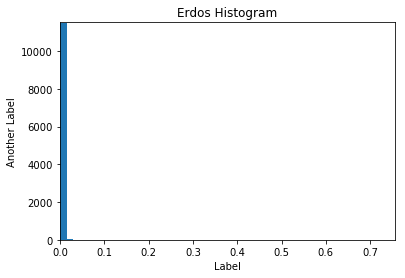

In [48]:
print nx.info(g4)

ymax = max(bn_cent4.keys())
xmax = max(bn_cent4.values())
figure()
hist(bn_cent4.values(),bins=50)
title('Erdos Histogram') 
xlabel('Label')
ylabel('Another Label')
axis([0, xmax, 0, ymax])
savefig('Erdos_histogram1.png')

fout = "bn_cent4.txt"
fo = open(fout, "w")

for k, v in bn_cent4.items():
    fo.write(str(k) + ' ' + str(v) + '\n')

fo.close()

### For larger networks, in case the calculation of the betweenness centrality takes a long time, you can use the  following faster code which uses all the cores of the processing unit.

In [8]:
from multiprocessing import Pool
import itertools

def chunks(l, n):
    """Divide a list of nodes `l` in `n` chunks"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x
        
def _betmap(G_normalized_weight_sources_tuple):
    """Pool for multiprocess only accepts functions with one argument.
    This function uses a tuple as its only argument. We use a named tuple for
    python 3 compatibility, and then unpack it when we send it to
    `betweenness_centrality_source`
    """
    return nx.betweenness_centrality_subset(*G_normalized_weight_sources_tuple)

def betweenness_centrality_parallel(G, processes=4):
    """Parallel betweenness centrality function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool)*4
    node_chunks = list(chunks(G.nodes(), int(G.order()/node_divisor)))
    # print node_chunks
    num_chunks = len(node_chunks)
    
    bt_sc = p.map(_betmap,
                 zip([G]*num_chunks,
                    node_chunks,
                    [list(G)]*num_chunks,
                    [True]*num_chunks,
                    [None]*num_chunks))
    
    # print bt_sc
    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [ ]:
%%time
'''
Your code here.
'''
#bn_cent=betweenness_centrality_parallel(g1)
#hist(bn_cent.values())
#show()

bn_cent2=betweenness_centrality_parallel(g23)
#hist(bn_cent2.values())
#show()

#bn_cent3=betweenness_centrality_parallel(g33)
#hist(bn_cent3.values())
#show()

#bn_cent4=betweenness_centrality_parallel(g4)
#print "bn cent 4 complete"
#hist(bn_cent4.values())
#show()

'''
if __name__ == "__main__":
    G_ba = nx.barabasi_albert_graph(1000, 3)
    G_er = nx.gnp_random_graph(1000, 0.01)
    G_ws = nx.connected_watts_strogatz_graph(1000, 4, 0.1)
    for G in [G_ba, G_er, G_ws]:
        print("")
        print("Computing betweenness centrality for:")
        print(nx.info(G))
        print("\tParallel version")
        start = time.time()
        bt = betweenness_centrality_parallel(G)
        print("\t\tTime: %.4F" % (time.time() - start))
        print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))
        print("\tNon-Parallel version")
        start = time.time()
        bt = nx.betweenness_centrality(G)
        print("\t\tTime: %.4F seconds" % (time.time() - start))
        print("\t\tBetweenness centrality for node 0: %.5f" % (bt[0]))
    print("")

    nx.draw(G_ba,node_size=10,width=0.05)
    plt.show()
    '''

## Task 2: Gephi
### In this task we will use Gephi to visualize the networks that you analyzed. In the previous task, you saved the graph in the gml format such that each node has the degree and its betweenness centrality as its attribute. In this task you are going to use these attributes to have a better visualization of the graph. Follow these steps to find a nice and meaningfull visualization of the graphs:

### Open Gephi-->> Open the '.gml' file of a network -->> Change 'Layout' of the graph (e.g., to Force Atlas 2, etc.) to have a better visualisation -->> In 'Appearance' window there are multiple options to change appearance of the nodes/ edges of the graph according to the various network properties like degree, clustering coefficient, modularity class, etc.-->> Change node size according to Degree distribution. -->> Save image file and include it in the following cell for each of the above networks.

### Repeat the above procedure using betweenness centrality. 

### In addition to including all your visulizations for each of the four networks in your notebook, include the GML and SVG formats of these visulizaitons in your submission. 

### Answer these questions for the citation and Erdos networks:
### -- Label the nodes with the name of the authors such that the font size is proportional to the size of the node.
### -- Based on your visualizations who is the author with the largest node? Is this conclusion consistent across the two visulizations (using degree and betweenness centrality) of the graph? What about the author with the second largest node?


In [ ]:
'''
Your code here.
'''
#Citation Net



#Erdos Network

#Degree Largest label Abbott
#-----2nd Largest label Aull

#Betweeness Largest label Paul Erdos
#-----2nd Largest label Alon


In [2]:
'''
Your visulizations here.
'''



'\nYour visulizations here.\n'

<img src='fb1.png'>

<img src='Erdos.png'>
